In [8]:
using LinearAlgebra
using Plots
using GenericLinearAlgebra

In [9]:
using StaticArrays
using Enzyme
using Zygote

# Standard Neo-Hookean formulation in initial configuration with Enzyme-AD

We consider the shear term in Neo-Hookean hyperelasticity:

\begin{align}
\phi_{\text{shear}} &= - \mu log J + \mu trace E \\
&= - \mu log (\sqrt{|I + 2 E|}) + \mu trace E 
\end{align}

\begin{equation}
S_{\text{shear}} = \partial{\phi_{\text{shear}}} / \partial{E} \\
\end{equation}

In [20]:
psi1(E; mu=1.) = mu * (-log(det(I+2E))/2 + tr(E))

function rel_error_psi(eps, F, repr)
    ref = F(big.(eps*E)) # arbitrary precision
    norm(F(repr.(eps*E)) - ref) / norm(ref)
end

rel_error1 (generic function with 1 method)

In [21]:
dudX = randn(3,3)
E = .5 * (dudX + dudX' + dudX' * dudX)

3×3 Matrix{Float64}:
  0.334505   0.142191    -0.700747
  0.142191   0.00882643  -1.44096
 -0.700747  -1.44096      3.6926

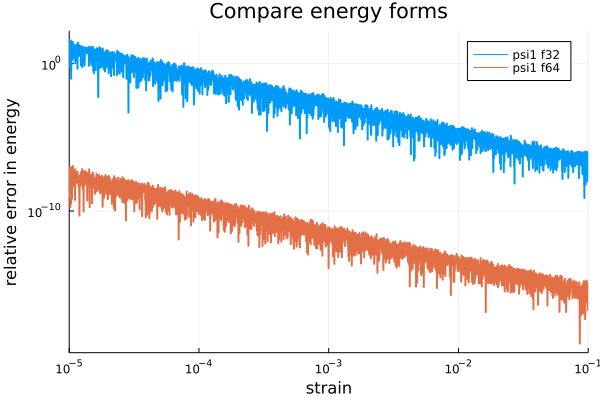

In [30]:
plot([
        e -> rel_error_psi(e, psi1, Float32),
        e -> rel_error_psi(e, psi1, Float64)],
    label=["psi1 f32" "psi1 f64"],
    title = "Compare energy forms",
    xlabel="strain", ylabel="relative error in energy",
    xlim=(1e-5, .1), xscale=:log10, yscale=:log10, linewidth=2)

In [31]:
function S(E, psi)
    stress, = Zygote.gradient(psi, E)
    stress
end 

function S_analytical(E)
    C = I + 2*E
    2*inv(C)*E
end

S_analytical (generic function with 1 method)

In [32]:
S(E, psi1)

3×3 Matrix{Float64}:
  -779.725   -5672.34   -2080.03
 -5672.34   -41248.1   -15125.1
 -2080.03   -15125.1    -5545.15

In [33]:
S_analytical(E)

3×3 Matrix{Float64}:
  -779.725   -5672.34   -2080.03
 -5672.34   -41248.1   -15125.1
 -2080.03   -15125.1    -5545.15

In [34]:
function rel_error(eps, psi, repr)
    ref = S(big.(eps*E), psi) # arbitrary precision
    norm(S(repr.(eps*E), psi) - ref) / norm(ref)
end


rel_error (generic function with 1 method)

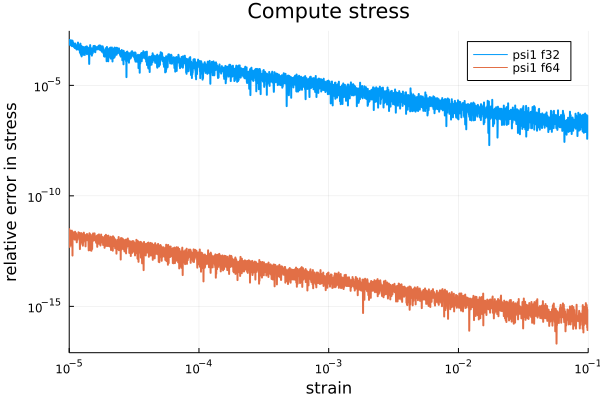

In [29]:
plot([
        e -> rel_error(e, psi1, Float32),
        e -> rel_error(e, psi1, Float64)],
    label=["psi1 f32" "psi1 f64"],
    title = "Compute stress",
    xlabel="strain", ylabel="relative error in stress",
    xlim=(1e-5, .1), xscale=:log10, yscale=:log10, linewidth=2)